In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
csv_dir = "/hdd/open-images/csvs"
train_csv = pd.read_csv(f"{csv_dir}/train-annotations-bbox.csv")
print("Number of labels: ", len(train_csv))
print("Number of images: ", train_csv["ImageID"].nunique())
train_csv.head()

Number of labels:  14610229
Number of images:  1743042


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [3]:
label_counts = train_csv["LabelName"].value_counts()
print("Min label count: ", min(label_counts))
print("Max label count: ", max(label_counts))
print("Number of classes: ", len(label_counts))
num_greater_than_50 = len(label_counts[label_counts >= 50])
print("Number of classes with at least 50 examples: ", num_greater_than_50)

Min label count:  4
Max label count:  1438128
Number of classes:  599
Number of classes with at least 50 examples:  574


In [9]:
print(train_csv["Source"].value_counts())
print(train_csv["Confidence"].value_counts())

xclick       13050532
activemil     1559697
Name: Source, dtype: int64
1    14610229
Name: Confidence, dtype: int64


Num greater than 100:  3600
Percent less than 100:  0.9979346452925403
Percent less than 20:  0.9055851780966838
count    1.743042e+06
mean     8.382029e+00
std      1.245305e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.000000e+01
max      7.450000e+02
Name: ImageID, dtype: float64


(array([1333890.,  244583.,   84597.,   36811.,   16546.,   10189.,
           5829.,    3390.,    2068.,    1435.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

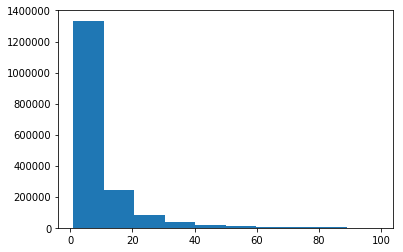

In [7]:
num_labels_per_image_counts = train_csv.ImageID.value_counts()
num_greater_than_100 = len(num_labels_per_image_counts[num_labels_per_image_counts > 100])
print("Num greater than 100: ",num_greater_than_100)
percent_less_than_100 = 1 - num_greater_than_100 / len(num_labels_per_image_counts)
print("Percent less than 100: ",percent_less_than_100)
percent_less_than_20 = len(num_labels_per_image_counts[num_labels_per_image_counts <= 20]) / len(num_labels_per_image_counts)
print("Percent less than 20: ", percent_less_than_20)
print(num_labels_per_image_counts.describe())
plt.hist(num_labels_per_image_counts[num_labels_per_image_counts < 100])

In [10]:
image_detail_cols = ["IsTruncated", "IsOccluded", "IsTruncated", "IsGroupOf", "IsDepiction", "IsInside"]
for col in image_detail_cols:
    print(col)
    print(train_csv[col].value_counts())

IsTruncated
 0    10922480
 1     3665878
-1       21871
Name: IsTruncated, dtype: int64
IsOccluded
 1    9651132
 0    4937226
-1      21871
Name: IsOccluded, dtype: int64
IsTruncated
 0    10922480
 1     3665878
-1       21871
Name: IsTruncated, dtype: int64
IsGroupOf
 0    13713801
 1      874557
-1       21871
Name: IsGroupOf, dtype: int64
IsDepiction
 0    13791999
 1      796359
-1       21871
Name: IsDepiction, dtype: int64
IsInside
 0    14552771
 1       35587
-1       21871
Name: IsInside, dtype: int64
